In [1]:
# import libraries
import numpy as np
import xarray as xr
import cloudfraction
import matplotlib.pyplot as plt

In [2]:
def domainavg(var):
    # domain average to make a 1D profile
    return(np.squeeze(np.nanmean(var,axis=(1,2))))

def extract(model_stm,var):
    # extract data from 3D model output
    ds = xr.open_dataset(model_stm,decode_times=False)
    v = np.squeeze(ds[var].values)
    ds.close()
    return(v)

In [5]:
model_dir = '/path/to/3D/output/SAM_CRM_RCE_large295_3D_0000720000.nc'

cw = extract(model_dir,'clw') # g/g
ci = extract(model_dir,'cli') # g/g

ta = extract(model_dir,'ta') # K
pa = extract(model_dir,'pa') # Pa

cldv1,cldv2=cloudfraction.cloudfraction(cw,ci,ta,pa)
del cw,ci,ta,pa

z = np.squeeze(xr.open_dataset(model_dir,decode_times=False)['z'].values)

cldv1   = domainavg(cldv1) # unitless
cldv2   = domainavg(cldv2) # unitless

cds = xr.open_dataset('/path/to/1D/profiles/SAM-CRM_large295_1D-profiles.nc')
cr=cds['Cr'].values
cg=cds['Cg'].values
cb=cds['Cb'].values
ca=cds['Ca'].values

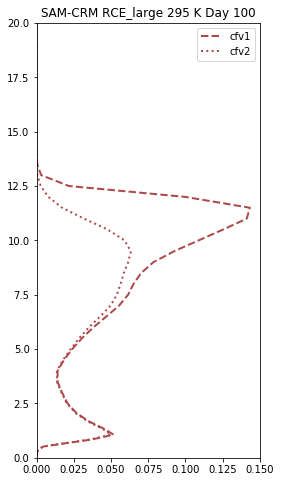

In [9]:
plt.figure(figsize=(4,8))
plt.plot(cldv1,z/1000,color=[cr,cg,cb,ca],linewidth=2,linestyle='--',label='cfv1')
plt.plot(cldv2,z/1000,color=[cr,cg,cb,ca],linewidth=2,linestyle=':',label='cfv2')
plt.ylim(0,20)
plt.xlim(0,0.15)
plt.title('SAM-CRM RCE_large 295 K Day 100')
plt.legend()
plt.show()